In [1]:
import pandas as pd
users = pd.read_csv('C:\\Users\\Owner\\Desktop\\Manipulating_Df\\users.csv')[['weekday', 'city', 'visitors', 'signups']]

In [2]:
users.head()

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


In [7]:
pivot1 = users.pivot(index = 'weekday', columns = 'city', values = 'visitors')
pivot1

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


In [8]:
pivot2 = users.pivot(index = 'weekday', columns = 'city')
pivot2

visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12

In [15]:
users1 = users.set_index(['city','weekday'])
users1 = users1.sort_index()
users1

visitors  signups
city   weekday                   
Austin Mon           326        3
       Sun           139        7
Dallas Mon           456        5
       Sun           237       12

In [16]:
city_index_only = users1.unstack('weekday') # you can also use index level to unstack. So city is level 0 weekday is level 1
city_index_only

visitors      signups    
weekday      Mon  Sun     Mon Sun
city                             
Austin       326  139       3   7
Dallas       456  237       5  12

In [17]:
adding_weekday_back = city_index_only.stack('weekday') # the only way to stack is using labels. 
adding_weekday_back

visitors  signups
city   weekday                   
Austin Mon           326        3
       Sun           139        7
Dallas Mon           456        5
       Sun           237       12

In [19]:
adding_weekday_back.swaplevel(0,1).sort_index() # swapping both indexes. its reverse of above indexes

visitors  signups
weekday city                     
Mon     Austin       326        3
        Dallas       456        5
Sun     Austin       139        7
        Dallas       237       12

In [40]:
test = pd.read_csv('C:\\Users\\LajpatraiVyas\\Desktop\\Manipulating_Df\\users.csv')[['weekday', 'city', 'visitors', 'signups']]
test1 = test.pivot(index = 'weekday', columns = 'city', values = 'visitors')
test2 = test1.reset_index()
pd.melt(test2, id_vars = ['weekday']) # add value_name = 'visitors' to change the name of column 'value' below

,weekday,city,value
0,Mon,Austin,326
1,Sun,Austin,139
2,Mon,Dallas,456
3,Sun,Dallas,237


In [43]:
pd.melt(users, id_vars = ['weekday', 'city']) #check this and the one below.

,weekday,city,variable,value
0,Sun,Austin,visitors,139
1,Sun,Dallas,visitors,237
2,Mon,Austin,visitors,326
3,Mon,Dallas,visitors,456
4,Sun,Austin,signups,7
5,Sun,Dallas,signups,12
6,Mon,Austin,signups,3
7,Mon,Dallas,signups,5


In [44]:
users # compare with above table

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


In [45]:
pd.melt(adding_weekday_back, col_level = 0) # compare with adding_weekday_back below. to get key value pairs 

,variable,value
0,visitors,326
1,visitors,139
2,visitors,456
3,visitors,237
4,signups,3
5,signups,7
6,signups,5
7,signups,12


In [46]:
adding_weekday_back #compare with above.

visitors  signups
city   weekday                   
Austin Mon           326        3
       Sun           139        7
Dallas Mon           456        5
       Sun           237       12

In [47]:
# pivot can be used when data has unique values. if data has repeated values use pivot_table

In [48]:
users.pivot_table(index='weekday', aggfunc='count') # count by weekday. so monday as 2 observations

,city,signups,visitors
weekday,,,
Mon,2,2,2
Sun,2,2,2


In [49]:
# to check if two df's are identical use df1.equals(df2) 

In [51]:
users.pivot_table(index='weekday', aggfunc = 'sum', margins = True)

,signups,visitors
weekday,,
Mon,8,782
Sun,19,376
All,27,1158


In [53]:
users.groupby('weekday').sum() # similar to pivot table above

,visitors,signups
weekday,,
Mon,782,8
Sun,376,19


In [54]:
users.groupby(['city', 'weekday']).sum() # if there were many obs it would have looked different from pivot

visitors  signups
city   weekday                   
Austin Mon           326        3
       Sun           139        7
Dallas Mon           456        5
       Sun           237       12

In [60]:
titanic = pd.read_csv('C:\\Users\\LajpatraiVyas\\Desktop\\Manipulating_Df\\titanic.csv')
titanic.groupby('pclass')['fare'].agg(['count', 'sum'])

,count,sum
pclass,,
1,323,28265.4043
2,277,5866.6374
3,708,9418.4452


In [58]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [98]:
gap = pd.read_csv('C:\\Users\\LajpatraiVyas\\Desktop\\Manipulating_Df\\gapminder_tidy.csv', index_col = 'Country')
gap.groupby('region')['life'].mean()

region
America                       68.722251
East Asia & Pacific           66.108632
Europe & Central Asia         71.931303
Middle East & North Africa    65.194301
South Asia                    57.137710
Sub-Saharan Africa            51.664426
Name: life, dtype: float64

In [110]:
gap.groupby(['Year', 'region'])['life'].mean().loc[[2000, 2005, 2010], 'South Asia']

Year  region    
2000  South Asia    63.60925
2005  South Asia    66.25000
2010  South Asia    68.18975
Name: life, dtype: float64

In [113]:
gap.groupby(['Year', 'region'])[['life', 'fertility']].agg(['mean', 'max']).loc[2010, 'America'] # custom function can be used
                                                                                                # to aggregate

life       mean    74.037350
           max     80.986000
fertility  mean     2.326522
           max      3.974000
Name: (2010, America), dtype: float64

In [115]:
gap.groupby(['Year', 'region'])[['life', 'fertility']].agg({'life':'mean', 'fertility':'max'}) # diff agg on diff columns

life  fertility
Year region                                          
1964 America                     60.462775      7.443
     East Asia & Pacific         56.798429      7.567
     Europe & Central Asia       67.840110      7.270
     Middle East & North Africa  52.119810      8.041
     South Asia                  43.877125      7.671
...                                    ...        ...
2013 East Asia & Pacific         74.077719      5.855
     Europe & Central Asia       76.108157      3.815
     Middle East & North Africa  73.259143      4.075
     South Asia                  69.188000      4.900
     Sub-Saharan Africa          58.941440      7.561

[300 rows x 2 columns]

In [118]:
sales = pd.read_csv('C:\\Users\\LajpatraiVyas\\Desktop\\Manipulating_Df\\sales-feb-2015.csv', parse_dates = True, 
                    index_col = 'Date')
sales

,Company,Product,Units
Date,,,
2015-02-02 08:30:00,Hooli,Software,3
2015-02-02 21:00:00,Mediacore,Hardware,9
2015-02-03 14:00:00,Initech,Software,13
2015-02-04 15:30:00,Streeplex,Software,13
2015-02-04 22:00:00,Acme Coporation,Hardware,14
2015-02-05 02:00:00,Acme Coporation,Software,19
2015-02-05 22:00:00,Hooli,Service,10
2015-02-07 23:00:00,Acme Coporation,Hardware,1
2015-02-09 09:00:00,Streeplex,Service,19


In [119]:
sales.groupby(sales.index.strftime('%a'))['Units'].sum() # **** VERY IMPORTANT *****

Mon    48
Sat     7
Thu    59
Tue    13
Wed    48
Name: Units, dtype: int64

In [124]:
import datetime as dt
my_date = dt.date(2015,2,2)
my_date.strftime('%a') # converts dates to weekdays

'Mon'

In [125]:
from scipy.stats import zscore

In [126]:
zscore(sales['Units'])

array([-1.1658622 , -0.03952075,  0.71137355,  0.71137355,  0.89909712,
        1.837715  ,  0.14820282, -1.54130935,  1.837715  , -0.4149679 ,
       -0.4149679 , -0.97813863,  0.14820282,  1.27454427,  0.14820282,
       -1.1658622 , -1.1658622 ,  0.14820282, -0.97813863])

In [127]:
sales.groupby('Company')['Units'].transform(zscore)

Date
2015-02-02 08:30:00   -0.912871
2015-02-02 21:00:00    0.000000
2015-02-03 14:00:00    1.224745
2015-02-04 15:30:00    0.162221
2015-02-04 22:00:00    0.351500
2015-02-05 02:00:00    1.010562
2015-02-05 22:00:00    1.217161
2015-02-07 23:00:00   -1.362062
2015-02-09 09:00:00    1.135550
2015-02-09 13:00:00   -0.471405
2015-02-11 20:00:00   -1.224745
2015-02-11 23:00:00   -0.608581
2015-02-16 12:00:00    1.217161
2015-02-19 11:00:00    1.649916
2015-02-19 16:00:00    0.235702
2015-02-21 05:00:00   -1.414214
2015-02-21 20:30:00   -0.912871
2015-02-25 00:30:00    0.000000
2015-02-26 09:00:00   -1.297771
Name: Units, dtype: float64

In [131]:
gap_2010 = gap[gap['Year'] == 2010]
gap_2010 = gap_2010.drop('Year', axis = 1)
gap_2010.shape

(202, 6)

In [132]:
gap_2010.groupby('region')[['life', 'fertility']].transform(zscore)

,life,fertility
Country,,
Afghanistan,-1.743601,2.504732
Albania,0.226367,0.010964
Algeria,-0.440196,-0.003972
Angola,-0.882537,1.095653
Antigua and Barbuda,0.240607,-0.363761
...,...,...
West Bank and Gaza,-0.033227,1.763918
Western Sahara,-1.198061,-0.441205
"Yemen, Rep.",-2.063848,2.120276


In [133]:
def impute_median(data):
    return data.fillna(data.median) # fillin NaN with median 

In [134]:
titanic.groupby(['sex','pclass'])['age'].transform(impute_median) # use apply if its a complex function

0                                                      29
1                                                    0.92
2                                                       2
3                                                      30
4                                                      25
                              ...                        
1304                                                 14.5
1305    <bound method Series.median of 603     35.0\n6...
1306                                                 26.5
1307                                                   27
1308                                                   29
Name: age, Length: 1309, dtype: object

In [135]:
def c_deck_survival(gr):

    c_passengers = gr['cabin'].str.startswith('C').fillna(False)

    return gr.loc[c_passengers, 'survived'].mean()

In [143]:
test1 = titanic.loc[titanic['cabin'].str.startswith('C').fillna(False), ['sex','survived']] # if you want to ignore NaN

In [147]:
test1.groupby('sex').sum()/test1.groupby('sex').count()

,survived
sex,
female,0.913043
male,0.312500


In [153]:
by_company = sales.groupby('Company')['Units'].sum()
by_company[by_company > 35]

Company
Mediacore    45
Streeplex    36
Name: Units, dtype: int64

In [155]:
sales.groupby('Company').filter(lambda g: g['Units'].sum() > 35) # *****VERY IMPORTANT ******

,Company,Product,Units
Date,,,
2015-02-02 21:00:00,Mediacore,Hardware,9
2015-02-04 15:30:00,Streeplex,Software,13
2015-02-09 09:00:00,Streeplex,Service,19
2015-02-09 13:00:00,Mediacore,Software,7
2015-02-19 11:00:00,Mediacore,Hardware,16
2015-02-19 16:00:00,Mediacore,Service,10
2015-02-21 05:00:00,Mediacore,Software,3
2015-02-26 09:00:00,Streeplex,Service,4


In [165]:
under10 = (titanic['age'] < 10).map({True: 'Under10', False: 'Over10' })
titanic.groupby(under10)['survived'].mean() # ***** Very IMPORTANT *******

age
Over10     0.366748
Under10    0.609756
Name: survived, dtype: float64

In [271]:
medals = pd.read_csv('C:\\Users\\LajpatraiVyas\\Desktop\\Manipulating_Df\\all_medalists.csv')
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [311]:
stats = medals[(medals['NOC'] == 'IND')].groupby(['Edition', 'Medal'])['Medal'].count()

In [240]:
stats.head(15)

Edition  Medal 
1900     Silver     2
1928     Gold      15
1932     Gold      11
1936     Gold      19
1948     Gold      20
1952     Bronze     1
         Gold      14
1956     Gold      17
1960     Silver    13
1964     Gold      15
1968     Bronze    15
1972     Bronze    14
1980     Gold      16
1996     Bronze     1
2000     Bronze     1
Name: Medal, dtype: int64

In [241]:
import matplotlib.pyplot as plt

In [252]:
table= medals.loc[:,['NOC', 'Medal']].groupby('NOC')['Medal'].count() # df.value_counts is also an option

In [274]:
table.sort_values(ascending = False)

NOC
USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
       ... 
ISV       1
KUW       1
MKD       1
MRI       1
AFG       1
Name: Medal, Length: 138, dtype: int64

In [254]:
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [272]:
counted = medals.pivot_table(index='NOC', columns='Medal', values='Athlete', aggfunc='count')
# Best use of pivot table. Athlete was used as values along with aggfunc to sum the number of medals

In [273]:
counted['Totals'] = counted.sum(axis='columns') # pandas dealt with NaN's 
counted.sort_values(by='Totals', ascending=False)

Medal,Bronze,Gold,Silver,Totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
...,...,...,...,...
MRI,1.0,NaN,NaN,1.0
NIG,1.0,NaN,NaN,1.0
TGA,NaN,NaN,1.0,1.0


In [278]:
country_grouped = medals.groupby('NOC')
Nsports = country_grouped['Sport'].nunique() # ****** Very important to count unique values *****
Nsports.sort_values(ascending=False)

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
       ..
ERI     1
TAN     1
ECU     1
DJI     1
AFG     1
Name: Sport, Length: 138, dtype: int64

In [277]:
country_grouped.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29102,Beijing,2008,Weightlifting,Weightlifting,"HOANG, Anh Tuan",VIE,Men,"- 56kg, total (bantamweight)",M,Silver
29127,Beijing,2008,Weightlifting,Weightlifting,"MARTIROSYAN, Tigran Gevorg",ARM,Men,69kg,M,Bronze
29180,Beijing,2008,Wrestling,Wrestling Free.,"ABDUSALOMOV, Yusup",TJK,Men,74 - 84kg,M,Silver
29194,Beijing,2008,Wrestling,Wrestling Gre-R,"TIUMENBAEV, Ruslan",KGZ,Men,55 - 60kg,M,Bronze


In [279]:
cold_war = (medals['Edition'] >= 1952) & (medals['Edition'] <= 1988)
countries = (medals['NOC'] == 'USA') | (medals['NOC'] == 'URS')

In [280]:
df = medals[cold_war & countries]

In [281]:
df.groupby('NOC')['Medal'].count()

NOC
URS    2049
USA    1495
Name: Medal, dtype: int64

In [285]:
df.groupby('NOC')['Sport'].nunique()

NOC
URS    21
USA    20
Name: Sport, dtype: int64

In [292]:
short_cut = medals.pivot_table(index = 'Edition', columns = 'NOC', values = 'Athlete', aggfunc='count')

In [298]:
short_cut.loc[1952:1988, ['USA','URS']]

NOC,USA,URS
Edition,,
1952,130.0,117.0
1956,118.0,169.0
1960,112.0,169.0
1964,150.0,174.0
1968,149.0,188.0
1972,155.0,211.0
1976,155.0,285.0
1980,NaN,442.0
1984,333.0,NaN


In [301]:
short_cut.loc[1952:1988, ['USA','URS']].idxmax(axis='columns')

Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object

In [302]:
short_cut.loc[1952:1988, ['USA','URS']].idxmax(axis='columns').value_counts()

URS    8
USA    2
dtype: int64

In [303]:
ind_medals = stats.unstack(level=1)

In [304]:
ind_medals

Medal,Bronze,Gold,Silver
Edition,,,
1900,NaN,NaN,2.0
1928,NaN,15.0,NaN
1932,NaN,11.0,NaN
1936,NaN,19.0,NaN
1948,NaN,20.0,NaN
1952,1.0,14.0,NaN
1956,NaN,17.0,NaN
1960,NaN,NaN,13.0
1964,NaN,15.0,NaN


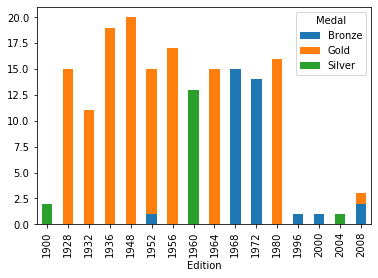

In [312]:
ind_medals.plot(kind='bar', stacked = True)

In [310]:
medals.Medal = pd.Categorical(values=medals.Medal, categories=['Bronze','Silver','Gold'], ordered=True)

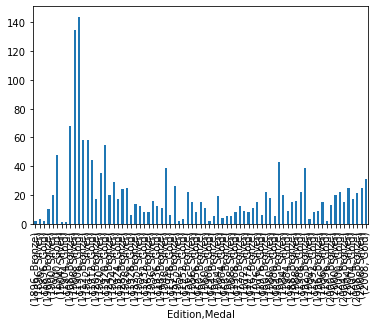

In [315]:
gbr_stats = medals[(medals['NOC'] == 'GBR')].groupby(['Edition', 'Medal'])['Medal'].count()
gbr_stats.unstack(level=1)
gbr_stats.plot(kind='bar', stacked = True)